In [1]:
import scipy.io 
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def display_palette(colors):
    fig = plt.figure()
    gs = plt.GridSpec(1, len(colors))
    for i, color in enumerate(colors):
        # display color
        ax = fig.add_subplot(gs[0, i])
        ax.imshow(color)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)

    fig.tight_layout()
    fig.subplots_adjust(wspace=0., hspace=0.)
    return fig

In [3]:
test = scipy.io.loadmat(".\colorCode\data\mturkData.mat")

other = {}
for key in test.keys():
    if key == "data":
        data = test[key]
    elif key[:2] == "__":
        continue
    else:
        other[key] = (test[key][:, 0])

print(data.shape)

df = pd.DataFrame.from_dict(other)

for i in range(data.shape[1]):
    col_prefix = "palette_" + str(i)
    rgb = ["R", "G", "B"]
    for j in range(3):
        colname = col_prefix + "_" + rgb[j]
        df[colname] = (data[:, i, j])



(10743, 5, 3)


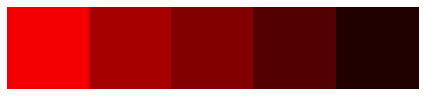

In [4]:
def make_color_array(colors):
    numColors, numComp = colors.shape
    allcolors = []
    for i in range(numColors):
        arr = np.ones((10, 10, numComp))
        arr[:, :, :] = colors[i, :]
        allcolors.append(arr)
    return allcolors

def display_from_df(palette_col):
    palette = make_color_array(palette_col)
    display_palette(palette)


display_from_df(data[5, :, :])

In [5]:
color_rating_data = df.copy()
color_rating_data.drop(["ids", "names", "targets"], inplace=True, axis=1)

display(color_rating_data[:5])


,userNormalizedTargets,palette_0_R,palette_0_G,palette_0_B,palette_1_R,palette_1_G,palette_1_B,palette_2_R,palette_2_G,palette_2_B,palette_3_R,palette_3_G,palette_3_B,palette_4_R,palette_4_G,palette_4_B
0,0.218844,0.345098,0.549020,0.549020,0.286275,0.419608,0.450980,0.749020,0.819608,0.850980,0.576471,0.682353,0.749020,0.450980,0.211765,0.254902
1,0.296755,0.835294,1.000000,0.870588,0.105882,0.800000,0.443137,0.000000,0.619608,0.458824,0.000000,0.400000,0.411765,0.152941,0.588235,0.749020
2,0.254885,0.956863,0.866667,0.694118,0.364706,0.443137,0.337255,0.325490,0.329412,0.274510,0.368627,0.266667,0.129412,0.568627,0.266667,0.062745
3,-0.355154,0.800000,0.752941,0.450980,1.000000,0.980392,0.411765,0.890196,0.662745,1.000000,0.800000,0.450980,0.658824,0.600000,0.133333,0.415686
4,-0.444863,0.517647,0.643137,0.062745,0.772549,0.576471,0.117647,0.380392,0.074510,0.074510,0.862745,0.239216,0.156863,0.862745,0.509804,0.176471


In [14]:
from sklearn.model_selection import train_test_split

color_rating_data = df.copy()
color_rating_data.drop(["ids", "names", "targets"], inplace=True, axis=1)
train_set, test_set = train_test_split(color_rating_data, test_size=0.2, random_state=42)
train_labels = train_set.pop("userNormalizedTargets")


In [15]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

Treinar regressão logística

In [17]:
lasso_reg = Lasso()
                        
scores = cross_val_score(lasso_reg, train_set, train_labels,
                         scoring="neg_mean_squared_error", cv=20)

mse_scores = np.sqrt(-scores)

In [18]:
print(mse_scores)
print(mse_scores.mean())
print(mse_scores.std())

[0.33209203 0.3255833  0.33730271 0.34105327 0.32052187 0.34772316
 0.34432372 0.32320036 0.33240618 0.3186875  0.33481286 0.34616914
 0.33325295 0.33468568 0.31621578 0.34373984 0.33511262 0.34266884
 0.3300453  0.31955212]
0.3329574607068001
0.009500781835622862
